
## Importing Packages and Libraries

In [49]:
from __future__ import division
from datetime import datetime, timedelta, date
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as snsa

import plotly.express as py
import plotly.offline as pyoff
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

## Exploratory  Data analysis

In [12]:
# Importing Data
pr_data = pd.read_excel(".\Desktop\purchase12data.xlsx", encoding='cp1252')

In [24]:
# Datatype of each variable
pr_data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
print(pr_data.shape)

(2240, 29)


In [7]:
pr_data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

#### Check Duplicates

In [10]:
# Check duplicate row in the dataframe
duplicateDFRow = pr_data[pr_data.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]


In [20]:
# Check duplicate row based on selected columns in the dataframe
duplicateRowsDF = pr_data[pr_data.duplicated(['ID'])]
duplicateRowsDF

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

#### Check Missing Value

##### Income has 24 missing values, now we check the type and look how we can impute missing values

In [20]:
pr_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [25]:
# Education taken as feature for imputation
pr_data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [41]:
# Mean of education group Income in data
grouped = pr_data.groupby('Education')['Income'].mean()
grouped

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

In [33]:
# Imputed the missing values in Income with mean of income corresponding education category.
pr_data['Income'] = pr_data['Income'].fillna(pr_data.groupby('Education')['Income'].transform('mean'))

In [34]:
# Check if any missing value exist
pr_data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

#### From Following description we can draw following stats:
#### Average income of customer is 52247 and high amount are spent on Wine product

In [11]:
pr_data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

## Feature Engineering
### Revenue Generated Per Product from Last Campsigns

In [42]:
amt_cols = [col for col in pr_data if (col.startswith('Mnt'))]
pr_rev=(pr_data[amt_cols]).astype(bool).sum(axis=0).reset_index()
pr_sum=(pr_data[amt_cols]).sum().reset_index()
pr_rev= pd.merge(pr_rev, pr_sum, on='index')
pr_rev.columns=['Product','Total_Purchase','Total_Revenue']
pr_rev["Rev_per_Product"]=pr_rev["Total_Revenue"]/pr_rev["Total_Purchase"]
pr_rev

Product  Total_Purchase  Total_Revenue  Rev_per_Product
0          MntWines            2227         680816       305.709924
1         MntFruits            1840          58917        32.020109
2   MntMeatProducts            2239         373968       167.024565
3   MntFishProducts            1856          84057        45.289332
4  MntSweetProducts            1821          60621        33.289951
5      MntGoldProds            2179          98609        45.254245

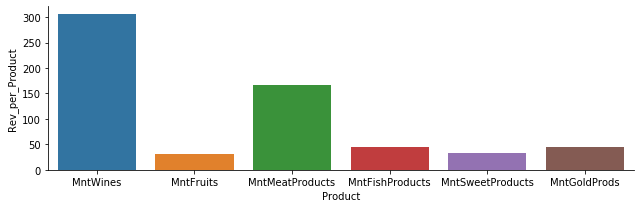

In [43]:
snsa.catplot(x='Product', y="Rev_per_Product",data=pr_rev, kind="bar", height=3, aspect= 3)

## Insights

### Wine - Highest Revenue Generator and Fruit -  Lowest Revenue Generator
### Meat -  Maximum Count of Purchase

### Question - Why revenue generated through fruit, fish, sweet and gold is less? Is it due to age factor or income standard or tennure with organization

# 1- Age Factor

In [44]:
Cus_Age = pr_data[["ID","Year_Birth"]]

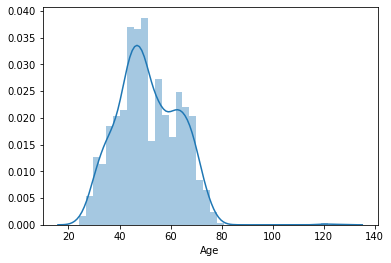

In [50]:
# Calculate Current Age of Customer using DOB
today=date.today()
Cus_Age = pr_data[["ID", "Year_Birth"]]
Cus_Age['Age'] = (today.year - pr_data['Year_Birth'])
Cus_Age
x = Cus_Age['Age']
ax = snsa.distplot(x)

#### Classify Customer on the basis of Age

In [55]:
Cus_Age['Age_Cat'] = 'Middle'
Cus_Age.loc[Cus_Age['Age'] <= 40,'Age_Cat'] = 'Adult' 
Cus_Age.loc[Cus_Age['Age'] >= 60,'Age_Cat'] = 'Old' 
Cus_Age.head()

ID  Year_Birth  Age Age_Cat
0  5524        1957   63     Old
1  2174        1954   66     Old
2  4141        1965   55  Middle
3  6182        1984   36   Adult
4  5324        1981   39   Adult

In [56]:
# Fetching all the colmuns of amount per product spent by customer
amt_cols = [col for col in pr_data if (col.startswith('Mnt'))]
Age_Count = Cus_Age.groupby('Age_Cat')['ID'].count().reset_index()
test = pd.merge(Cus_Age, pr_data, on='ID')
test1 = test.groupby('Age_Cat')[amt_cols].sum().reset_index()
Age_Count['Percentage'] = 100 * Age_Count['ID']  / Age_Count['ID'].sum()
cols= test1.columns

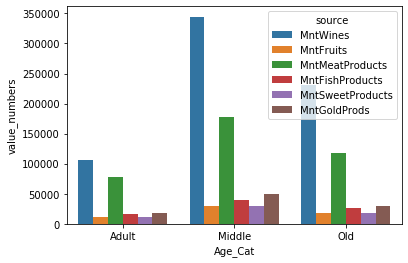

In [57]:
test_data_melted = pd.melt(test1, id_vars=cols[0],var_name="source", value_name="value_numbers")
g = snsa.barplot(x=cols[0], y="value_numbers", hue="source",data=test_data_melted)
plt.show()

#### Middle Age customer is higher revenue generator among all the six product
#### Adults are spending least on product compared to other age category.

# 2- Income Factor

Age_Cat  Income
0   Adult     424
1  Middle    1197
2     Old     619

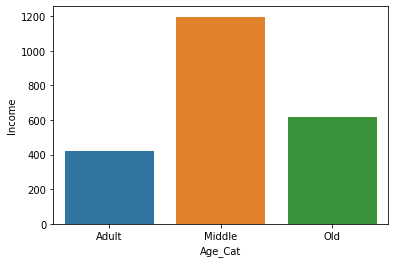

In [58]:
# Income earning by different aged customer usin "test" data
inc_data = test.groupby('Age_Cat')['Income'].count().reset_index()
snsa.barplot(x='Age_Cat', y="Income",data=inc_data)
# snsa.barplot(x='Age', y="Income", hue="Age_Cat",data=test)
inc_data

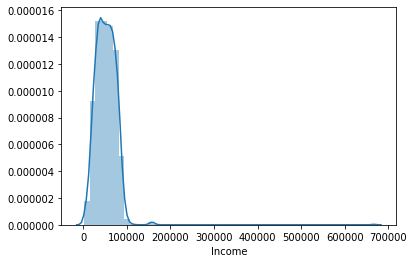

In [59]:
x = pr_data['Income']
x = pr_data['Income'].fillna(0)
ax = snsa.distplot(x)

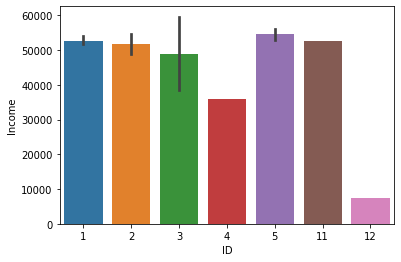

In [60]:
inc = test.groupby('Income')['ID'].count().reset_index()
snsa.barplot(x='ID', y="Income",data=inc)

In [61]:
test.groupby('Age_Cat')['Income'].agg(['count', 'min', 'max', 'mean', 'std', 'var']).reset_index()

Age_Cat  count     min       max          mean           std           var
0   Adult    424  6560.0  160803.0  46952.313228  24703.213224  6.102487e+08
1  Middle   1197  1730.0  666666.0  51322.166183  27351.345369  7.480961e+08
2     Old    619  5648.0  156924.0  57685.998693  18853.643497  3.554599e+08

Income Earned is equivalent to expenditure
High Var is accorded for Middle aged with High expenditure.

# 3-Tenure 

Age_Cat  tenure_yr
0   Adult        424
1  Middle       1197
2     Old        619

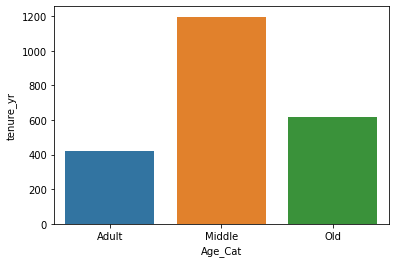

In [62]:
# tenure with organization
test['Dt_Customer'] = pd.to_datetime(pr_data['Dt_Customer'])
test['tenure_yr'] = test['Dt_Customer'].map(lambda date: today.year - date.year)
# tennure by different aged customer using "test" data
tennure_data = test.groupby('Age_Cat')['tenure_yr'].count().reset_index()
snsa.barplot(x='Age_Cat', y="tenure_yr",data=tennure_data)
# snsa.barplot(x='Age', y="Income", hue="Age_Cat",data=test)
tennure_data

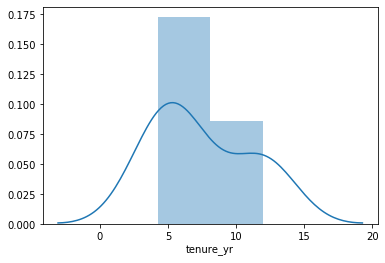

In [63]:
x = tennure_data['tenure_yr']
ax = snsa.distplot(x/100)

In [64]:
# Middle age people has high tennure with purchase site.
test_data_melted = pd.melt(test1, id_vars=cols[0],var_name="source", value_name="value_numbers")
test_data_melted = pd.merge(test_data_melted, tennure_data, on='Age_Cat')

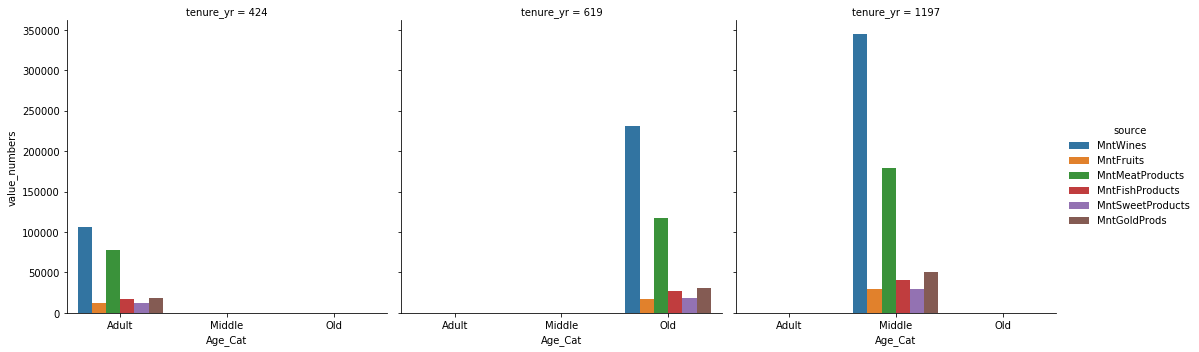

In [65]:
g = snsa.catplot(x=cols[0], y="value_numbers", hue="source",col="tenure_yr",
                data=test_data_melted, kind="bar",
                height=5, aspect=1)
plt.show()

In [66]:
edu = test[['Education','Age_Cat','ID']].groupby(['Education','Age_Cat'])['ID'].count().reset_index()

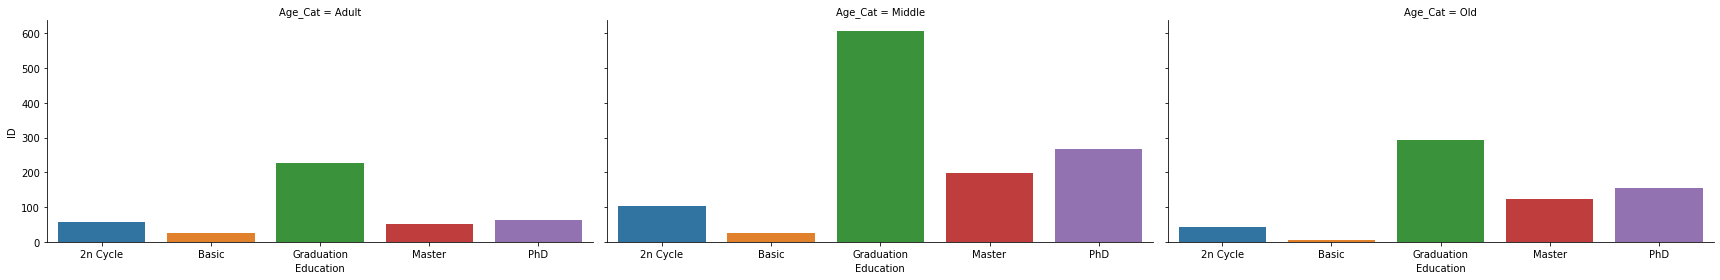

In [67]:
snsa.catplot(x='Education', y="ID", col="Age_Cat",
                data=edu, kind="bar",
                height=4, aspect=2)

In [68]:
edu

Education Age_Cat   ID
0     2n Cycle   Adult   58
1     2n Cycle  Middle  102
2     2n Cycle     Old   43
3        Basic   Adult   24
4        Basic  Middle   25
5        Basic     Old    5
6   Graduation   Adult  227
7   Graduation  Middle  607
8   Graduation     Old  293
9       Master   Adult   51
10      Master  Middle  197
11      Master     Old  122
12         PhD   Adult   64
13         PhD  Middle  266
14         PhD     Old  156

# Insights
Question - Why revenue generated through fruit, fish, sweet and gold is less? Is it due to age factor or income standard or tennure with organization
### * Middle Aged(40-60) -  They are highest revenue generator, have high income standard and tennure(1197 yr) with organization.
### * Old Aged(Above 60) -  They are the medium revenue generator, have income standard and tennure(619) with organization.
### * Adults(Less than 40) - They low revenue generator as high graduate people compared to Phd and Master.

# Revenue Generated through platform in Last 2 years

In [69]:
# Selecting all the plotform columns
platform = [col for col in pr_data if (col.startswith('Num'))]
pr_pl = (pr_data[platform]).astype(bool).sum(axis=0).reset_index()
pl_sum = (pr_data[platform]).sum().reset_index()
pr_pl = pd.merge(pr_pl, pl_sum, on='index')
pr_pl.columns = ['Purchase_Platform', 'Total_Customer', 'Total_Purchases']
pr_pl["Purchase_Per_Customer"] = pr_pl["Total_Purchases"] / pr_pl["Total_Customer"]
pr_pl

Purchase_Platform  Total_Customer  Total_Purchases  Purchase_Per_Customer
0    NumDealsPurchases            2194             5208               2.373747
1      NumWebPurchases            2191             9150               4.176175
2  NumCatalogPurchases            1654             5963               3.605200
3    NumStorePurchases            2225            12970               5.829213
4    NumWebVisitsMonth            2229            11909               5.342755

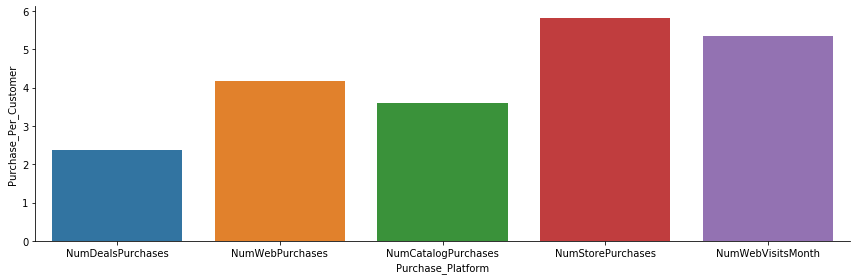

In [70]:
snsa.catplot(x='Purchase_Platform', y="Purchase_Per_Customer",data=pr_pl, kind="bar",
                height=4, aspect=3)

## Acceptance Ratio
### * Response - Latest, 6th Campaingn response from customers
### * Acceptance - Out of total treatment population , the actual accpeted counts

In [71]:
selected_cols = [col for col in pr_data if (col.startswith('Accep')) | (col.startswith('Resp'))]

Camp_Acceptance = pr_data[selected_cols].sum(axis=0).reset_index()
     
Camp_Acceptance.columns = ['Camp_no', 'Accpt_Count']
Camp_Acceptance["Accpt_Ratio"] = Camp_Acceptance["Accpt_Count"] / pr_data.shape[0]
Camp_Acceptance = Camp_Acceptance.sort_values(by=['Camp_no'])

In [72]:
Camp_Acceptance

Camp_no  Accpt_Count  Accpt_Ratio
3  AcceptedCmp1          144     0.064286
4  AcceptedCmp2           30     0.013393
0  AcceptedCmp3          163     0.072768
1  AcceptedCmp4          167     0.074554
2  AcceptedCmp5          163     0.072768
5      Response          334     0.149107

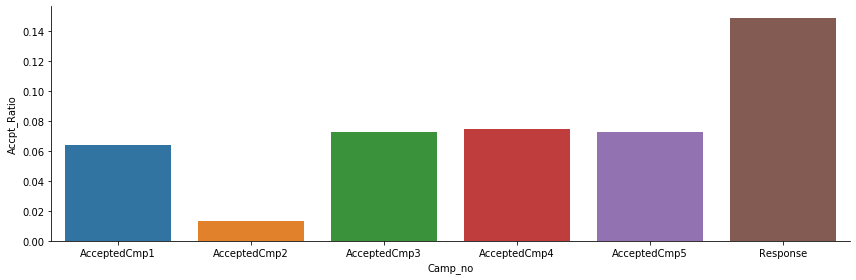

In [73]:
snsa.catplot(x='Camp_no', y="Accpt_Ratio",data=Camp_Acceptance, kind="bar",
                height=4, aspect=3)

#### Camp 2 has least acceptance as comapred to the other campaign and Camp 6 has recieved the highest response

### Acceptance and Non_Acceptance Trend in the last campaign

In [74]:
pr_data['past_5_acceptances'] = pr_data['AcceptedCmp1'] + pr_data['AcceptedCmp2'] + pr_data['AcceptedCmp3'] + pr_data['AcceptedCmp4'] + pr_data['AcceptedCmp5']
pr_data['Accpt_Trend'] = 'Not_Accepted'
pr_data.loc[pr_data['Response']==1,'Accpt_Trend'] = 'Accepted'
Accpt_sheet=pr_data.groupby(['past_5_acceptances','Accpt_Trend'])['Response'].count().reset_index()
Accpt_sheet

past_5_acceptances   Accpt_Trend  Response
0                   0      Accepted       146
1                   0  Not_Accepted      1631
2                   1      Accepted       101
3                   1  Not_Accepted       224
4                   2      Accepted        42
5                   2  Not_Accepted        41
6                   3      Accepted        35
7                   3  Not_Accepted         9
8                   4      Accepted        10
9                   4  Not_Accepted         1

Insights: Maximum acceptance is coming from Group 0(past_acceptance rate=0)
          Minimum acceptance is coming from Group 4(past_acceptance rate=4)

In [75]:
plot_data = [
    go.Histogram(
        x=pr_data.query("Accpt_Trend == 'Not_Accepted' and past_5_acceptances>0")['past_5_acceptances'],
        y=pr_data.query("Accpt_Trend == 'Not_Accepted' and past_5_acceptances>0")['Response'],
        name = 'Not_Accepted'
    ),
    go.Histogram(
        x=pr_data.query("Accpt_Trend == 'Accepted' and past_5_acceptances>0")['past_5_acceptances'],
        y=pr_data.query("Accpt_Trend == 'Accepted' and past_5_acceptances>0")['Response'],
        name = 'Accepted'
        
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Accpeted vs NotAccepted'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


# Insights: 
##### Least Purchase are made through discount
##### Max purchase are made by visiting stores
Now start with segmentation-RFM
#### Low Value: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.
#### Mid Value: In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.
#### High Value: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.
## Segmentation
Now,We are going to apply K-means clustering using following features:
### 1 Recency
Before that we need to know how many clusters we need for K-means algorithm. 
To find it out, we will apply Elbow Method.

In [76]:
# Recency of Customer
pr_data.Recency.describe()
#Here we saw that mean and median are equal. So 50% customer have around 49days recency

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

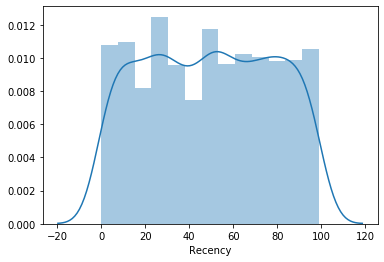

In [77]:
# #plot a recency histogram

# plot_data = [
#     go.Bar(
#         x = pr_data['Recency']
#     )
# ]

# plot_layout = go.Layout(
#         title='Recency'
#     )
# fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)
x = pr_data['Recency']
ax = snsa.distplot(x)

### Frequency

In [78]:
# Number of purchase made per customer
RFR=test
freq_col = [col for col in pr_data if (col.startswith('Num')) & (col.endswith('chases'))]
RFR['Frequency'] = pr_data[freq_col].sum(axis=1)

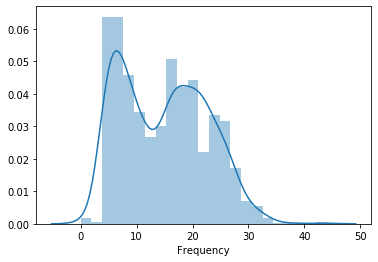

In [79]:
x = RFR['Frequency']
ax = snsa.distplot(x)

### Revenue

In [80]:
# Revenue generated per customer
rev_col = [col for col in pr_data if (col.startswith('Mnt'))]
RFR['Revenue'] = pr_data[rev_col].sum(axis=1)

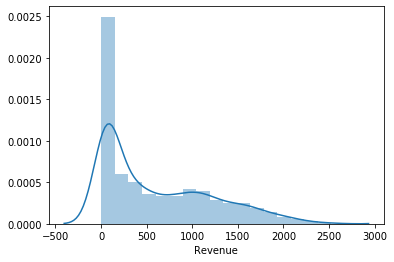

In [81]:
x = RFR['Revenue']
ax = snsa.distplot(x)

In [82]:
RFR.query("Frequency == 0").reset_index(drop=True)

ID  Year_Birth_x  Age Age_Cat  Year_Birth_y   Education Marital_Status  \
0   5555          1975   45  Middle          1975  Graduation       Divorced   
1   3955          1965   55  Middle          1965  Graduation       Divorced   
2  11110          1973   47  Middle          1973  Graduation         Single   
3  11181          1949   71     Old          1949         PhD        Married   

     Income  Kidhome  Teenhome  ... AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0  153924.0        0         0  ...            0             0             0   
1    4861.0        0         0  ...            0             0             0   
2    3502.0        1         0  ...            0             0             0   
3  156924.0        0         0  ...            0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  tenure_yr  Frequency  Revenue  
0         0              3         11         0          6          0        6  
1         0              3         11         0          6          0        6  
2         0              3         11         0          7          0        5  
3         0              3         11         0          7          0        8  

[4 rows x 35 columns]

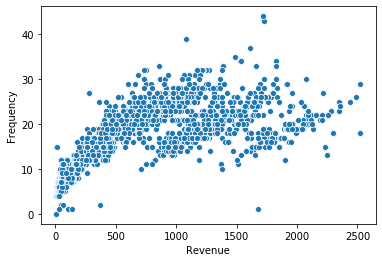

In [83]:
# Scatter plot using seaborn
snsa.scatterplot(x='Revenue', y='Frequency', data=RFR)

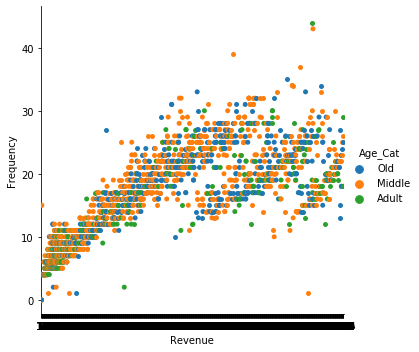

In [84]:
# Scatter plot using seaborn
snsa.catplot(x='Revenue', y='Frequency', hue= 'Age_Cat', data=RFR)

# Model Building

#### Normalization and Standarization

In [92]:
# As kmeans is sensitive to the variance in data, so mean will not sufficient. We will use standarization.
# Selective Features are in range of (-1,1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
RFR[['Recency','Frequency','Revenue','Age','tenure_yr','past_5_acceptances']] = (scaler.fit_transform(RFR[['Recency','Frequency','Revenue','Age','tenure_yr','past_5_acceptances']]))

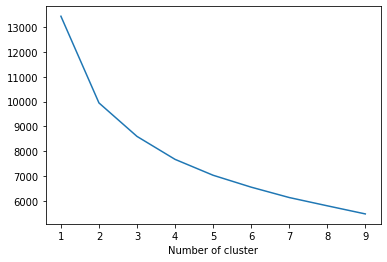

In [95]:
# Elbow Method
from sklearn.cluster import KMeans
sse={}
opt_k = RFR[['Recency','Frequency','Revenue','Age','tenure_yr','past_5_acceptances']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(opt_k)
    opt_k["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [96]:
# After applying Elbow Method- Optimal value of K, where most data got clustered.(K=3)
# KMEAN clustering
kmeans = KMeans(n_clusters=3)
RFR['KmeanCluster'] = kmeans.fit_predict(RFR[['Recency','Frequency','Revenue','Age','tenure_yr','past_5_acceptances']])

In [98]:
RFR.groupby('KmeanCluster')['Revenue'].describe()
RFR.groupby('KmeanCluster')['past_5_acceptances'].describe()

count      mean       std       min       25%       50%  \
KmeanCluster                                                             
0              904.0 -0.196018  0.547346 -0.439037 -0.439037 -0.439037   
1             1111.0 -0.318269  0.414077 -0.439037 -0.439037 -0.439037   
2              225.0  2.359099  1.301914  1.035390  1.035390  2.509818   

                   75%       max  
KmeanCluster                      
0            -0.439037  1.035390  
1            -0.439037  2.509818  
2             2.509818  5.458673

In [99]:
RFR.groupby('KmeanCluster')['Recency','Frequency','Revenue','Age','tenure_yr','past_5_acceptances'].mean()

Recency  Frequency   Revenue       Age  tenure_yr  \
KmeanCluster                                                       
0             0.014140   0.844506  0.588559  0.321428   0.252829   
1            -0.006606  -0.849346 -0.808926 -0.222198  -0.191687   
2            -0.024191   0.800843  1.629600 -0.194262  -0.069302   

              past_5_acceptances  
KmeanCluster                      
0                      -0.196018  
1                      -0.318269  
2                       2.359099

In [100]:
# Segment customer High-Mid-Low value customer 
# High Value: Improve Response
# Mid Value: Improve Response + Increase Frequency
# Low Value: Increase Frequency
RFR['Segment'] = 'Low-Value'
RFR.loc[RFR['KmeanCluster'] == 2,'Segment'] = 'Mid-Value' 
RFR.loc[RFR['KmeanCluster'] == 0,'Segment'] = 'High-Value' 

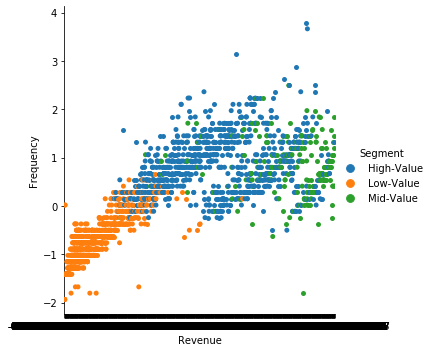

In [101]:
# Scatter plot using seaborn
snsa.catplot(x='Revenue', y='Frequency', hue= 'Segment', data=RFR)

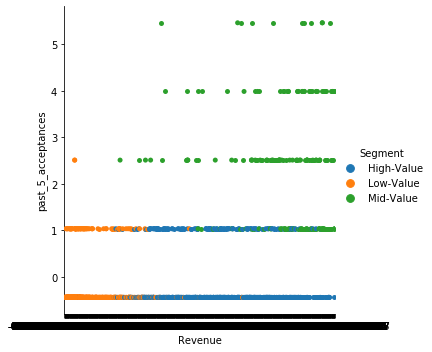

In [102]:
snsa.catplot(x='Revenue', y='past_5_acceptances', hue= 'Segment', data=RFR)

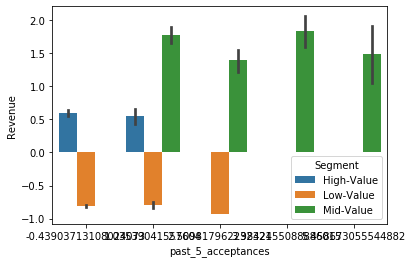

In [103]:
snsa.barplot(x='past_5_acceptances', y='Revenue', hue= 'Segment', data=RFR)

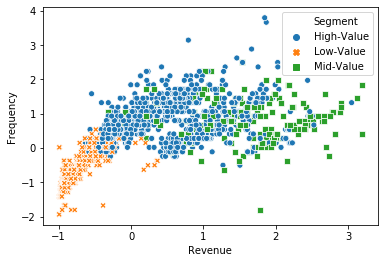

In [104]:
snsa.scatterplot(x='Revenue', y='Frequency', style='Segment',
                hue='Segment', data=RFR)


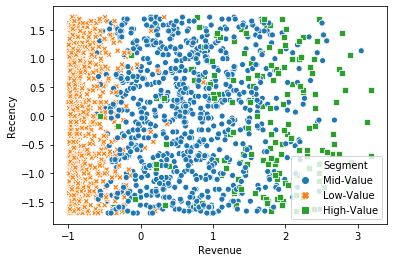

In [98]:
snsa.scatterplot(x='Revenue', y='Recency', style='Segment',
                hue='Segment', data=RFR)

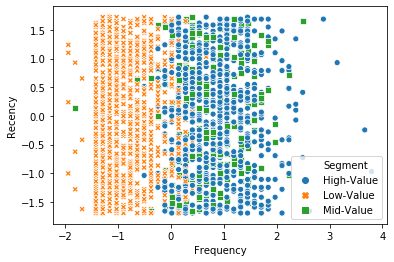

In [105]:
snsa.scatterplot(x='Frequency', y='Recency', style='Segment',
                hue='Segment', data=RFR)

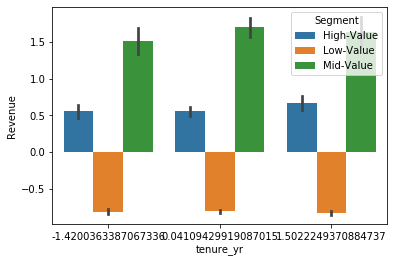

In [106]:
snsa.barplot(x='tenure_yr', y='Revenue',hue='Segment', data=RFR)

# One Hot-Encoding

In [107]:
# Cluster column- Education
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(pr_data[['Education']]).toarray())

In [108]:
# merge with main df bridge_df on key values
new = pr_data.join(enc_df)
new

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  \
0            0  2012-09-04       58       635  ...              3         11   
1            1  2014-03-08       38        11  ...              3         11   
2            0  2013-08-21       26       426  ...              3         11   
3            0  2014-02-10       26        11  ...              3         11   
4            0  2014-01-19       94       173  ...              3         11   
...        ...         ...      ...       ...  ...            ...        ...   
2235         1  2013-06-13       46       709  ...              3         11   
2236         1  2014-06-10       56       406  ...              3         11   
2237         0  2014-01-25       91       908  ...              3         11   
2238         1  2014-01-24        8       428  ...              3         11   
2239         1  2012-10-15       40        84  ...              3         11   

      Response  past_5_acceptances   Accpt_Trend    0    1    2    3    4  
0            1                   0      Accepted  0.0  0.0  1.0  0.0  0.0  
1            0                   0  Not_Accepted  0.0  0.0  1.0  0.0  0.0  
2            0                   0  Not_Accepted  0.0  0.0  1.0  0.0  0.0  
3            0                   0  Not_Accepted  0.0  0.0  1.0  0.0  0.0  
4            0                   0  Not_Accepted  0.0  0.0  0.0  0.0  1.0  
...        ...                 ...           ...  ...  ...  ...  ...  ...  
2235         0                   0  Not_Accepted  0.0  0.0  1.0  0.0  0.0  
2236         0                   1  Not_Accepted  0.0  0.0  0.0  0.0  1.0  
2237         0                   1  Not_Accepted  0.0  0.0  1.0  0.0  0.0  
2238         0                   0  Not_Accepted  0.0  0.0  0.0  1.0  0.0  
2239         1                   0      Accepted  0.0  0.0  0.0  0.0  1.0  

[2240 rows x 36 columns]

In [109]:
# # Dummies- To create prefix of columns
ed_df = pd.DataFrame(pr_data['Education'].unique(), columns=['Education_Types'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(ed_df, columns=["Education_Types"], prefix=["Type_is"] )
# merge with main df bridge_df on key values
ed_df = ed_df.join(dum_df)

In [110]:
ed_df 

Education_Types  Type_is_2n Cycle  Type_is_Basic  Type_is_Graduation  \
0      Graduation                 0              0                   1   
1             PhD                 0              0                   0   
2          Master                 0              0                   0   
3           Basic                 0              1                   0   
4        2n Cycle                 1              0                   0   

   Type_is_Master  Type_is_PhD  
0               0            0  
1               0            1  
2               1            0  
3               0            0  
4               0            0

In [111]:
# Matial Status
# Dummies- To create prefix of columns
mr_df = pd.DataFrame(pr_data['Marital_Status'].unique(), columns=['Marital_Types'])
# generate binary values using get_dummies
dum1_df = pd.get_dummies(mr_df, columns=["Marital_Types"], prefix=["Type_is"] )
# merge with main df bridge_df on key values
mr_df = mr_df.join(dum1_df)

In [112]:
mr_df

Marital_Types  Type_is_Absurd  Type_is_Alone  Type_is_Divorced  \
0        Single               0              0                 0   
1      Together               0              0                 0   
2       Married               0              0                 0   
3      Divorced               0              0                 1   
4         Widow               0              0                 0   
5         Alone               0              1                 0   
6        Absurd               1              0                 0   
7          YOLO               0              0                 0   

   Type_is_Married  Type_is_Single  Type_is_Together  Type_is_Widow  \
0                0               1                 0              0   
1                0               0                 1              0   
2                1               0                 0              0   
3                0               0                 0              0   
4                0               0                 0              1   
5                0               0                 0              0   
6                0               0                 0              0   
7                0               0                 0              0   

   Type_is_YOLO  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7             1

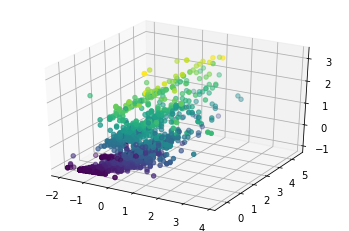

In [113]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

# # Data for a three-dimensional line
# zline = np.linspace(0, 15, 1000)
# xline = np.sin(zline)
# yline = np.cos(zline)
# ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = RFR['Revenue']
xdata = RFR['Frequency']
ydata = RFR['past_5_acceptances']
ax.scatter3D(xdata, ydata, zdata, c=zdata);

# Logistic Regression - Classification Model

In [114]:
segments = pd.get_dummies(RFR['Segment'],drop_first=True)
seg_cols = [col for col in segments]
RFR = pd.concat([RFR,segments],axis=1)

In [115]:
# Shuffle & Split the data into train, validation test set in the ratio of 70:20:10 
train, validate, test = np.split(RFR.sample(frac=1), [int(.7*len(RFR)), int(.9*len(RFR))])

In [116]:
RFR['Segment'].value_counts()

Low-Value     1111
High-Value     904
Mid-Value      225
Name: Segment, dtype: int64

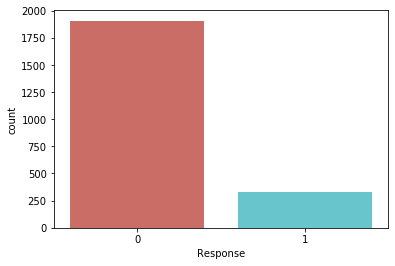

In [117]:
# Let us explore our target variable and visualize it.
RFR.Response.value_counts()
snsa.countplot(x = 'Response', data = RFR, palette = 'hls')
plt.show()

In [127]:
def get_X_Y(df, features, response):
    return df[features], df[response]

In [120]:
# Defining dependent and target variables
predictors = ['Recency', 'Frequency', 'Revenue', 'Age', 'tenure_yr',
              'past_5_acceptances'] + seg_cols
dependent = 'Response'
X_train, y_train =  get_X_Y(train, predictors, dependent)
X_valid, y_valid =  get_X_Y(validate, predictors, dependent)
X_test, y_test =  get_X_Y(test, predictors, dependent)

In [121]:
# Training and Prediction
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [122]:
predictions = logmodel.predict(X_valid)

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       378
           1       0.80      0.34      0.48        70

    accuracy                           0.88       448
   macro avg       0.84      0.66      0.71       448
weighted avg       0.88      0.88      0.86       448



In [124]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_valid, predictions)
cnf_matrix

array([[372,   6],
       [ 46,  24]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

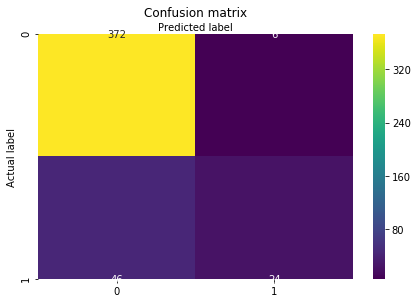

In [125]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
snsa.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [126]:
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
def multiclass_roc_auc_score(y_valid, predictions, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(predictions)
    y_valid = lb.transform(y_valid)
    predictions = lb.transform(predictions)
    return roc_auc_score(y_valid, predictions, average=average)
auc = multiclass_roc_auc_score(y_valid, predictions, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.6634920634920636


# Decision Tree

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)